<a href="https://www.inove.com.ar"><img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center"></a>


# Procesamiento de lenguaje natural
## RNN one-to-many

#### Datos
El objecto es utilizar una serie de sucuencias númericas (datos sintéticos) para poner a prueba el uso de las redes RNN. Este ejemplo se inspiró en otro artículo, lo tienen como referencia en el siguiente link:\
[LINK](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras-part-2/)

In [1]:
import re

import numpy as np
import pandas as pd

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

In [2]:
# Generar datos sintéticos
X = list()
y = list()

# X es una lista de números de 1 al 43 que avanzan de 3 en 3
X = [x for x in range(1, 44, 3)]

# "y" (target) se obtiene como por cada dato de entrada se
# se obtienen dos datos de salida como x+1 y x+2
y = [ [x+1, x+2] for x in X]

print("datos X:", X)
print("datos y:", y)

datos X: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
datos y: [[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]


In [3]:
# Cada dato X lo transformarmos en una matriz de 1 fila 1 columna (1x1)
X = np.array(X).reshape(len(X), 1, 1)
print("datos X:", X)

datos X: [[[ 1]]

 [[ 4]]

 [[ 7]]

 [[10]]

 [[13]]

 [[16]]

 [[19]]

 [[22]]

 [[25]]

 [[28]]

 [[31]]

 [[34]]

 [[37]]

 [[40]]

 [[43]]]


In [4]:
y = np.asanyarray(y)
y.shape

(15, 2)

### 2 - Entrenar el modelo

In [5]:
input_shape = X[0].shape
input_shape

(1, 1)

In [6]:
output_shape = y.shape[1]
output_shape

2

In [7]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=input_shape))
model.add(Dense(output_shape))
model.compile(loss='mse',
              optimizer="Adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 17,026
Trainable params: 17,026
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
3/3 [==============================] - 2s 168ms/step - loss: 448.7826 - val_loss: 1645.4541
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 443.3743 - val_loss: 1625.6569
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 436.9962 - val_loss: 1605.7777
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 431.1003 - val_loss: 1584.4336
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 425.1141 - val_loss: 1562.5215
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 419.2917 - val_loss: 1539.3633
Epoch 7/500
3/3 [==============================] - 0s 23ms/step - loss: 413.4216 - val_loss: 1514.7692
Epoch 8/500
3/3 [==============================] - 0s 21ms/step - loss: 406.8885 - val_loss: 1489.2451
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 399.3197 - val_loss: 1463.3151
Epoch 10/500
3/3 [==============================] - 0s 20ms/step - loss:

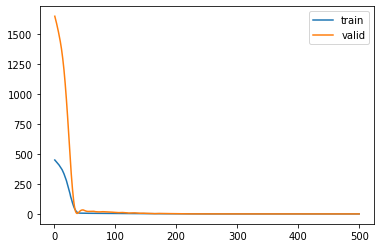

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_loss'], label='valid')
plt.show()

In [10]:
# Ensayo
x_test = 10
y_test = [x_test + 1, x_test + 2]
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model.predict(test_input, verbose=0)[0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model.evaluate(test_input, np.array([y_test]))

y_test: [11, 12]
y_hat: [11.052835 12.145233]
1/1 [==============================] - 0s 17ms/step - loss: 0.0119


0.011942127719521523

### 3 - Multi-layer RNN

In [11]:
# En esta oportunidad se utilizarán dos layer LSTM. Para poder conectar
# la primera layer con la segunda se debe colocar return_sequences=True

model2 = Sequential()
model2.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
model2.add(LSTM(64, activation='relu'))
model2.add(Dense(output_shape))
model2.compile(loss='mse',
              optimizer="Adam")

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 64)             16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 50,050
Trainable params: 50,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist2 = model2.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
3/3 [==============================] - 3s 227ms/step - loss: 468.0031 - val_loss: 1717.2759
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 465.3730 - val_loss: 1705.0522
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 462.5412 - val_loss: 1691.0077
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 459.2073 - val_loss: 1673.9351
Epoch 5/500
3/3 [==============================] - 0s 24ms/step - loss: 455.8828 - val_loss: 1653.0135
Epoch 6/500
3/3 [==============================] - 0s 19ms/step - loss: 451.1818 - val_loss: 1628.4508
Epoch 7/500
3/3 [==============================] - 0s 22ms/step - loss: 445.9660 - val_loss: 1597.8604
Epoch 8/500
3/3 [==============================] - 0s 22ms/step - loss: 439.4684 - val_loss: 1559.3413
Epoch 9/500
3/3 [==============================] - 0s 18ms/step - loss: 432.4383 - val_loss: 1509.1989
Epoch 10/500
3/3 [==============================] - 0s 18ms/step - loss:

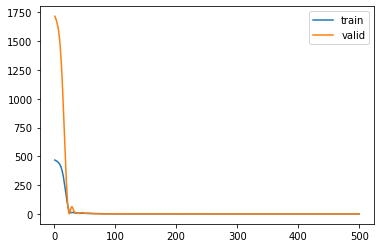

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist2.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist2.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist2.history['val_loss'], label='valid')
plt.show()

In [14]:
# Ensayo
x_test = 10
y_test = [x_test + 1, x_test + 2]
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model2.predict(test_input, verbose=0)[0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model2.evaluate(test_input, np.array([y_test]))

y_test: [11, 12]
y_hat: [11.0116   12.022623]
1/1 [==============================] - 0s 18ms/step - loss: 3.2318e-04


0.0003231761511415243

### 4 - Conclusión
La unica diferencia que se debe tener en cuenta cuando hay más de una salida es que la cantidad de neuronas de la última capa debe coincidir con el tamaño de la secuencia de salida.
En este ejemplo, donde el problema es más complejo, hubo una diferencia apreciable entre utilizar una sola capa o varias LSTM.